# Police Dataset Analysis

# 1. Remove the column that only contains missing values

In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

police = pd.read_csv('police-dataset.csv')
police.head(10)

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
5,3/23/2005,9:45,NaN,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
6,4/1/2005,17:30,NaN,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
7,6/6/2005,13:20,NaN,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
8,7/13/2005,10:15,NaN,M,1970.0,35.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
9,7/13/2005,15:45,NaN,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [5]:
police.isna().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [6]:
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       61474 non-null  object 
 4   driver_age_raw      61481 non-null  float64
 5   driver_age          61228 non-null  float64
 6   driver_race         61475 non-null  object 
 7   violation_raw       61475 non-null  object 
 8   violation           61475 non-null  object 
 9   search_conducted    65535 non-null  bool   
 10  search_type         2479 non-null   object 
 11  stop_outcome        61475 non-null  object 
 12  is_arrested         61475 non-null  object 
 13  stop_duration       61475 non-null  object 
 14  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 6.6+

In [8]:
# the information above states that country_name column contains all null values
police.drop('country_name', axis=1, inplace=True)

In [9]:
police

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


# 2. For Speeding, were Men or Women stopped more often?

In [12]:
speeding = police[police['violation'] == 'Speeding']

In [14]:
speeding['driver_gender'].value_counts()
# so Men are stopped more often

driver_gender
M    25517
F    11686
Name: count, dtype: int64

# 3. Does gender affect who gets searched during a stop?

In [18]:
searched = police[police['search_conducted'] == True]
searched['driver_gender'].value_counts()
# yes, gender might have an effect as there are more males that get searched rather than females

driver_gender
M    2113
F     366
Name: count, dtype: int64

# 4. What is the mean stop_duration?

In [24]:
mean_stop_duration = np.mean(police['stop_duration'].map({'0-15 Min':7.5, '16-30 Min':23, '30+ Min':60}))
mean_stop_duration

12.647078439665549

# 5. Compare the age distributions for each violation

In [27]:
police['driver_age'].unique()

array([20., 40., 33., 19., 21., 23., 36., 35., 26., 39., 50., 47., 52.,
       38., nan, 41., 28., 46., 32., 58., 27., 43., 24., 17., 22., 44.,
       48., 34., 55., 51., 45., 29., 31., 37., 67., 25., 42., 30., 18.,
       57., 49., 61., 70., 53., 60., 59., 64., 63., 54., 56., 66., 62.,
       69., 81., 68., 76., 75., 74., 82., 65., 72., 16., 77., 73., 71.,
       80., 79., 78., 88., 15., 83., 86., 84., 85.])

In [37]:
mean_every_violation = police.groupby('violation')['driver_age'].mean().reset_index()
mean_every_violation

,violation,driver_age
0,Equipment,31.682957
1,Moving violation,36.736443
2,Other,40.362381
3,Registration/plates,32.656696
4,Seat belt,30.333333
5,Speeding,33.262581


In [38]:
police.groupby('violation')['driver_age'].std()

violation
Equipment              11.380671
Moving violation       13.258350
Other                  12.754423
Registration/plates    11.150780
Seat belt              10.214369
Speeding               12.615781
Name: driver_age, dtype: float64

<Axes: xlabel='violation', ylabel='driver_age'>

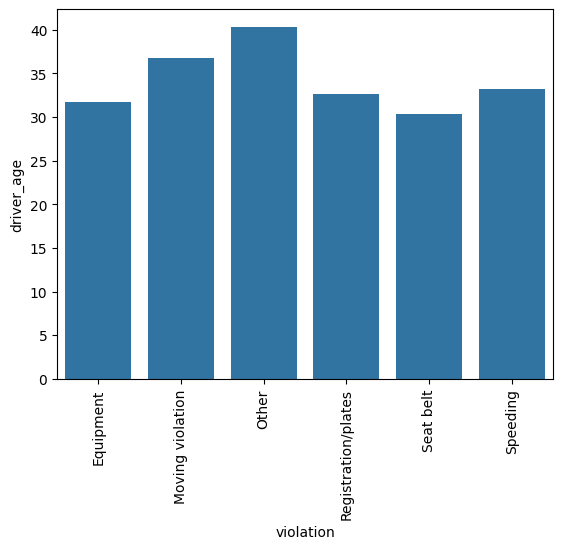

In [89]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)
sns.barplot(x='violation', y='driver_age', data=mean_every_violation, ax=ax)

# 6. Plot the distribution of Men and Women for every Violation

In [102]:
men_women_violation = police.groupby('violation')['driver_gender'].value_counts().reset_index()
men_violation = men_women_violation[men_women_violation['driver_gender'] == 'M'].reset_index(drop=True)
women_violation = men_women_violation[men_women_violation['driver_gender'] == 'F'].reset_index(drop=True)

add_data = {'violation': 'Seat belt', 'driver_gender': 'F', 'count': 0}
women_violation.loc[len(women_violation)] = add_data
women_violation.sort_values('violation', inplace=True)

In [103]:
men_violation.sort_values('violation', inplace=True)

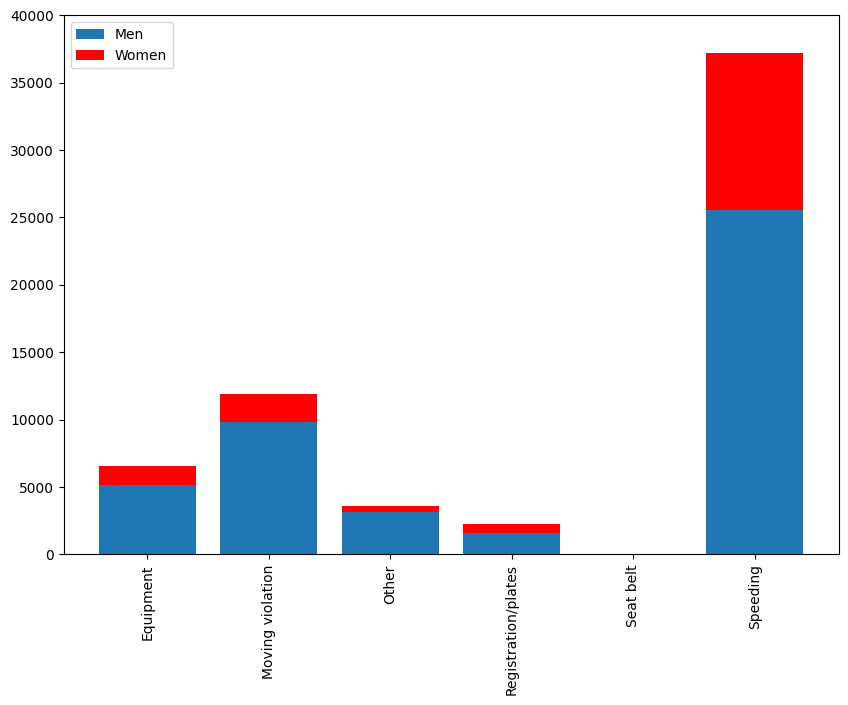

In [109]:
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation=90)
ax.bar(men_violation.violation.unique(), men_violation['count'], label='Men')
ax.bar(women_violation.violation.unique(), women_violation['count'], bottom=men_violation['count'], label='Women', color='red')
ax.set_ylim([0, 40000])
plt.legend()